# Feature histograms
This notebook demonstrates how to visualize and control histograms of measured features within napari.

In [1]:
import napari
from napari_skimage_regionprops import regionprops_table
import numpy as np
from skimage.data import cells3d
from skimage.filters import gaussian
from skimage.measure import label

from napari_matplotlib import FeatureHistogramWidget

We start by loading an image showing nuclei and their segmentation into napari.

In [2]:
image = cells3d()[30,1]
blurred = gaussian(image, sigma=2, preserve_range=True)
binary = blurred > 9000
labels = label(binary)

In [3]:
viewer = napari.Viewer()
viewer.add_image(image)
viewer.add_labels(labels, name="Segmented nuclei")

<Labels layer 'Segmented nuclei' at 0x26b40800ac0>

Next we determine quantiative measurements (features) using [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops).

In [4]:
regionprops_table(image, 
                  labels, 
                  size=True, 
                  intensity=True, 
                  shape=True,
                  napari_viewer=viewer)

Just to check, we quickly read out the `area` measurements.

In [5]:
area = viewer.layers[-1].features["area"]
area

0     1465
1      205
2     1277
3      190
4       29
5     1698
6       37
7     3196
8     1904
9       12
10       9
11     963
12    1804
13    4594
14    1769
15    1849
16    6346
17     230
18    2534
19    1075
20      10
21     821
22      54
Name: area, dtype: int32

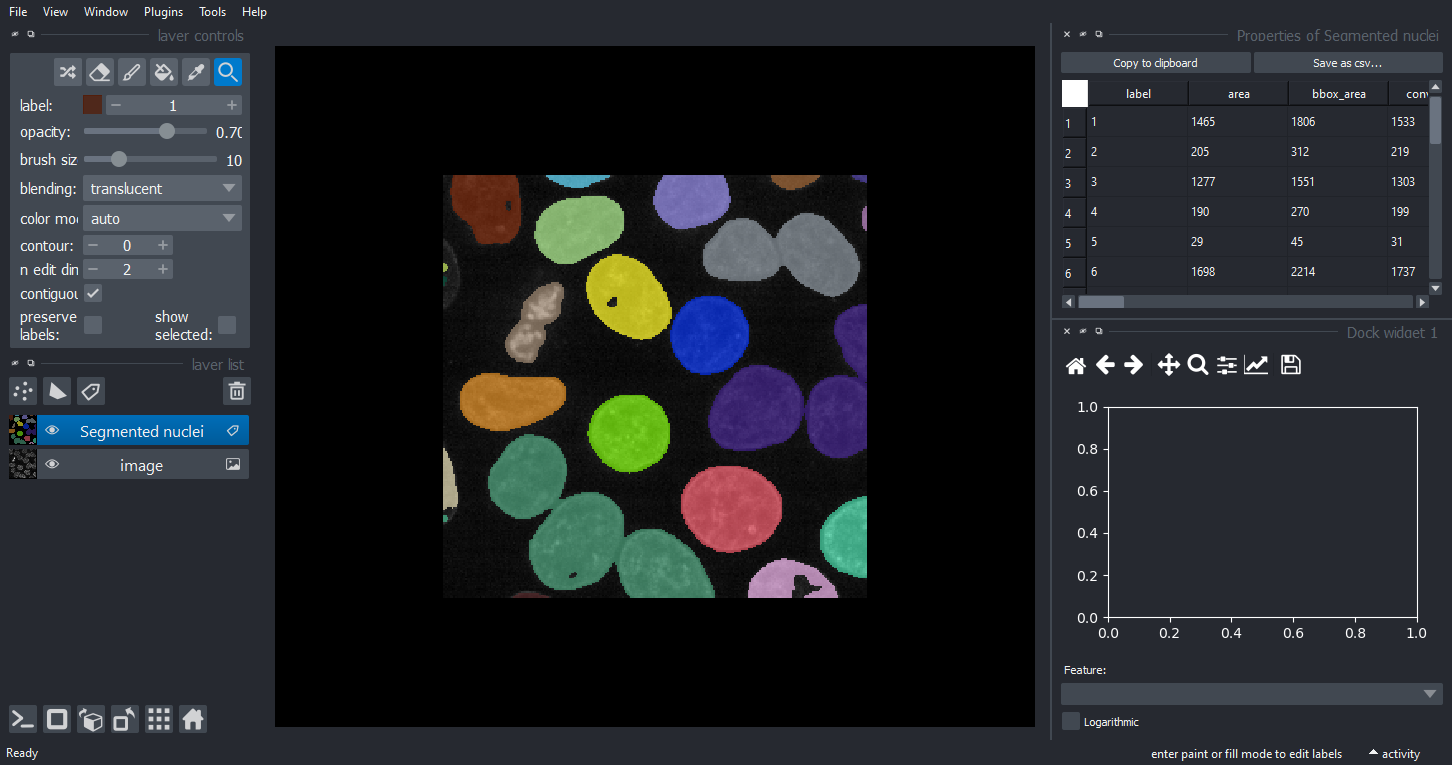

In [6]:
fhw = FeatureHistogramWidget(napari_viewer=viewer)
viewer.window.add_dock_widget(fhw)

napari.utils.nbscreenshot(viewer)

We can select entries from the feature pulldown.

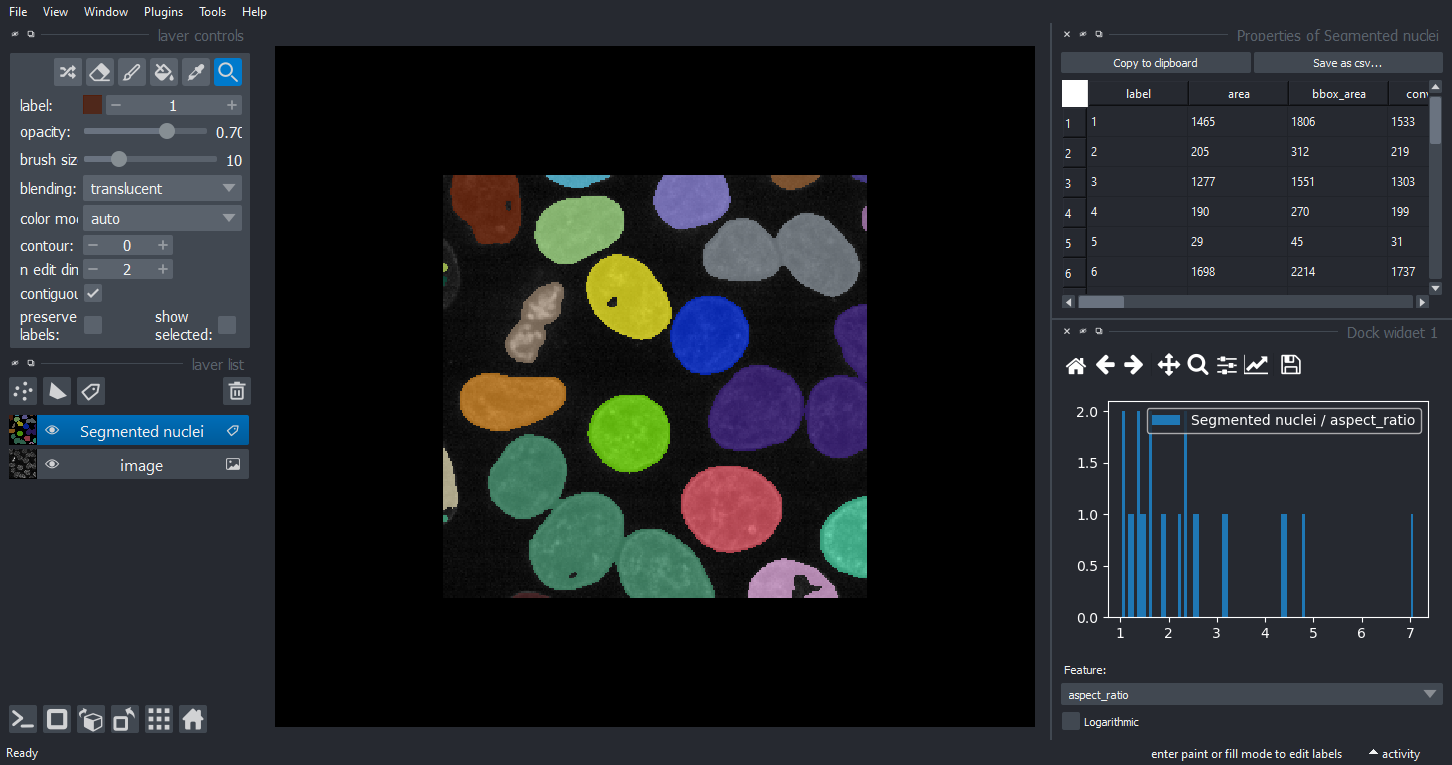

In [7]:
fhw.plot_column_name.setCurrentIndex(18)

napari.utils.nbscreenshot(viewer)

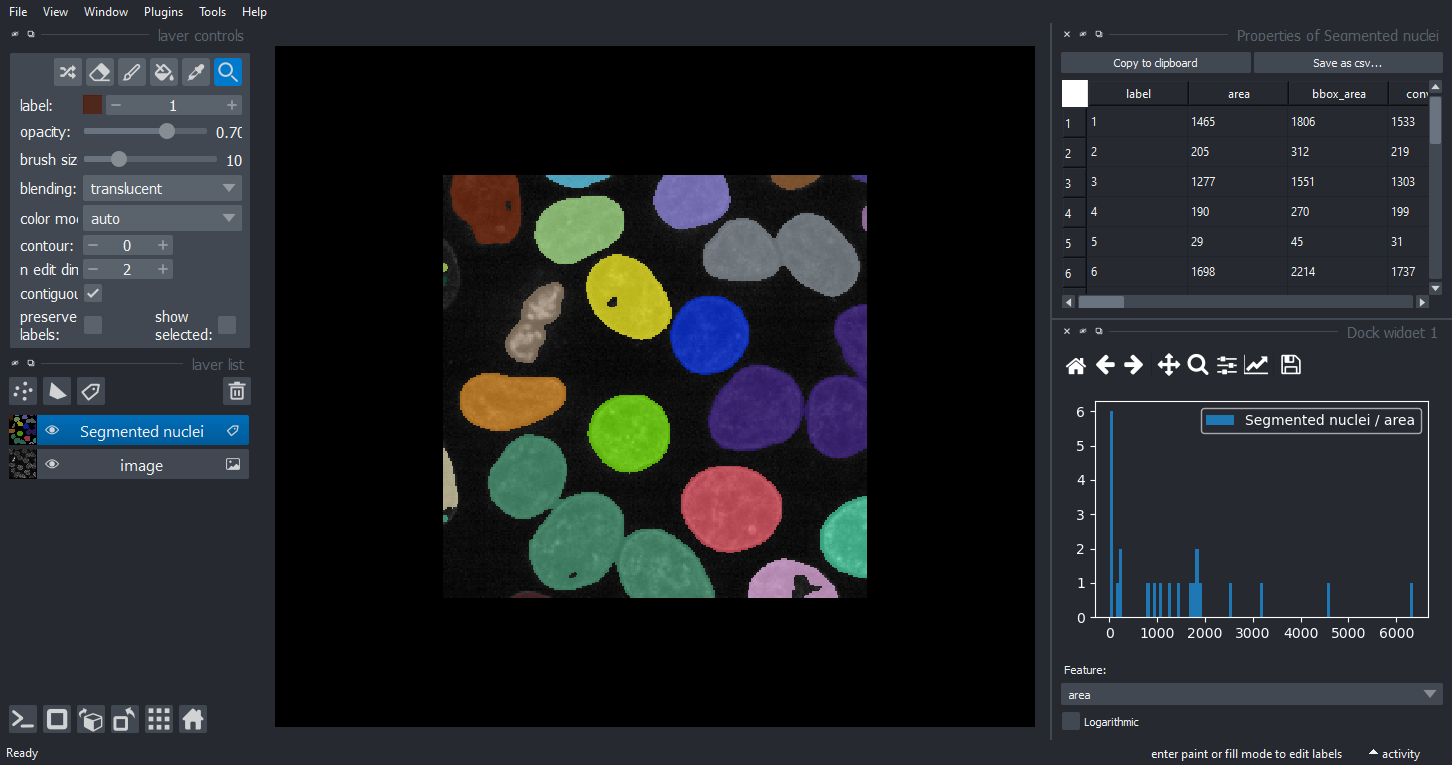

In [8]:
fhw.plot_column_name.setCurrentIndex(1)

napari.utils.nbscreenshot(viewer)

And we can activate the logarithmic view like this.

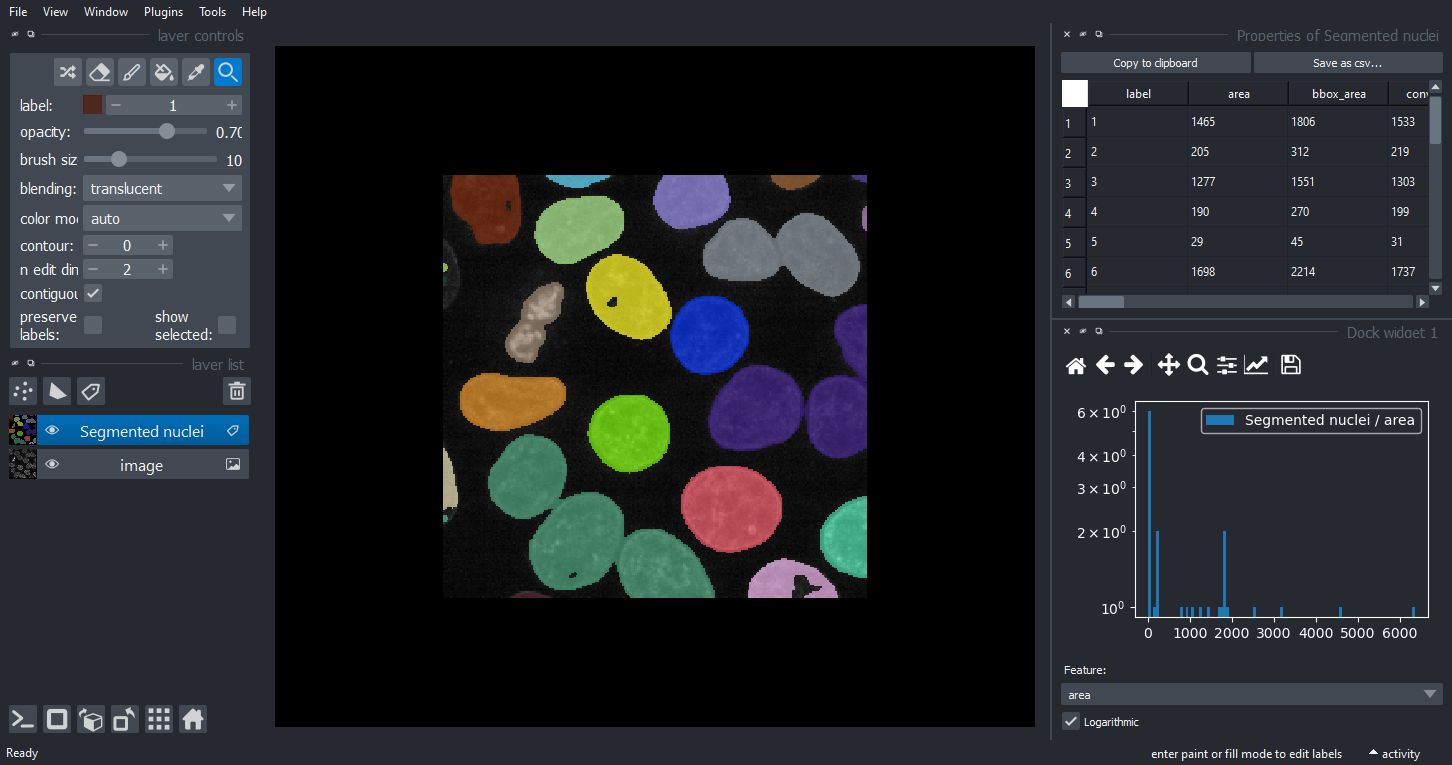

In [9]:
fhw.logarithmic_plot.setChecked(True)

napari.utils.nbscreenshot(viewer)